In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]


C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [7]:
#fullyactive = Active.drop(Active[Active['crop_list'].str.contains('UNCULTIVATED') ].index)


#nona = fullyactive.iloc[:,1:61].dropna()

# dont' RUN FROM HERE TO 

In [227]:
Unsurestatus = Active[Active['crop_list'].str.contains('UNCULTIVATED')]

In [335]:
Uncultivated = Active[Active['crop_list'] == 'UNCULTIVATED AG']

In [369]:
letstrain = pd.concat([unknowns,Uncultivated])
fullx = letstrain.iloc[:,1:61].dropna()
fully = letstrain.loc[fullx.index,'is_active']

In [370]:
fully = np.where(letstrain.loc[fullx.index,'crop_list'].str.contains('Unknown'),0,1)
fully

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
from sklearn.metrics import confusion_matrix

In [292]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()

In [935]:
(tn,fp,fn,tp)


(300, 53, 45, 2500)

In [299]:

testingdf = Unsurestatus.iloc[:,1:61].dropna()

preds = clf.predict(Unsurestatus.iloc[:,1:61].dropna())







In [300]:
unsurepreds = Unsurestatus.loc[testingdf.index,:]

In [878]:
#unsurepreds[unsurepreds['isactiveimpute'] == 0][['crop_list','OBJECTID']]


set(fullyactive.crop_list)

{'ALFALFA',
 'ALFALFA GRASS M',
 'ALFALFA, SAFFLOWER',
 'ALFALFA, WHEAT',
 'ALMOND',
 'ALMOND, APRICOT, CHERRY, NECTARINE, PEACH, PRUNE',
 'ALMOND, BEEHIVE',
 'ALMOND, FORAGE HAY/SLGE',
 'APPLE',
 'APPLE, APRICOT, CHERRY, PEACH',
 'APRICOT',
 'APRICOT, CHERRY, PEACH',
 'APRICOT, NECTARINE, PEACH',
 'BARLEY',
 'BEAN DRIED',
 'BEAN DRIED, WHEAT',
 'BEEHIVE',
 'BEEHIVE, UNCUL NON-AG',
 'BLACKBERRY',
 'BLUEBERRY',
 'BROCCOLI, MELON',
 'CABBAGE SEED, ONION SEED, CARROT SEED',
 'CANTALOUPE',
 'CHERRY',
 'CHESTNUT',
 'CITRUS',
 'COMM. FUMIGATN',
 'CORN FOR/FOD',
 'CORN SEED, SAFFLOWER SEED',
 'CORN, HUMAN CON',
 'CUCUMBER',
 'CUCUMBER SEED',
 'DITCH, BANK',
 'FIG',
 'FORAGE HAY/SLGE',
 'FRUIT, BERRY',
 'FRUIT, BERRY, CHERRY, POMEGRANATE',
 'FUMIGATN, OTHER',
 'GARBANZO BEAN',
 'GP-FLWRNG PLANT',
 'GRAPE',
 'GRAPE, WINE',
 'GRASS SEED, UNCUL NON-AG',
 'HEMP/CANNABIS',
 'HOPS',
 'INDUSTRIAL SITE',
 'KIWI',
 'LANDSCAPE MAIN',
 'MELON SEED',
 'N-GRNHS PLANT',
 'N-GRNHS TRANSPL',
 'N-OUTDR FLOWERS

In [535]:
#CbandDensity= pd.read_csv('ColorbandsDF.csv',)
nonones = CbandDensity[pd.notna(CbandDensity['crop_list'])]
#hold = pd.DataFrame(['UNCULTIVATED' in i for i in nonones.crop_list ],index=nonones.index)


tomatoandalfalfa = fullyactive[fullyactive.crop_list.str.contains('ALMOND') | fullyactive.crop_list.str.contains('WALNUT')] 
colorbands = tomatoandalfalfa.iloc[:,:61]
colorbands['crop_list'] = tomatoandalfalfa.crop_list
colorbands.loc[colorbands.crop_list.str.contains('ALMOND'),'crop_list']  = 'ALMOND'
nona= colorbands.dropna()
fullx = nona.iloc[:,1:-1]
fully = np.where(colorbands['crop_list'] == 'ALMOND',0,1)
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clfs = LogisticRegression()
clfs.fit(X_train,Y_train)
sv = clfs.predict(X_test)
clfs.score(X_test,Y_test)

0.8685121107266436

In [521]:
clfs.coef_.argmax()

59

In [522]:
X_test.columns[59]

'Band10firstquart'

In [447]:
j = 0
for i in clfs.coef_[0]:
    
    print(j,i)
    j +=1

0 0.0025749447329205854
1 0.003997120152933425


In [34]:
nonones.loc[nonones['crop_list'].str.contains('UNCULTIVATED'),'crop_list'] = 'UNCULTIVATED'

/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [219]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9658385093167702

In [552]:
tomats = Active[Active.crop_list.str.contains('TOMATO')]

# TO HERE

In [109]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [110]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [111]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'








C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C

In [112]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'

nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'











C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marce\Anac

In [8]:
OAT 338
SAFFLOWER 348
CORN 355
WALNUT 600
GRAPE 676
RICE 773
UNKNOWN 1021
ALMOND 1099
SUNFLOWER SEED 1216
WHEAT 1323
UNCULTIVATED AG 1444
ALFALFA 1541
TOMATO PROCESS 1702

SyntaxError: invalid syntax (<ipython-input-8-786198a09a3c>, line 1)

In [187]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Marcel Look Here for stuff

In [229]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

In [230]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [231]:
nonorg[['crop_list','code']][nonorg['crop_list'] != 0]

{"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"Corn":2,}

{'WALNUT': 9,
 'ALFALFA': 0,
 'OAT': 4,
 'GRAPE': 3,
 'ALMOND': 1,
 'WHEAT': 10,
 'RICE': 5,
 'Corn': 2}

In [232]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [233]:
preds = tester.predict(X_test)

print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))



0.6592664092664092
0.8781370656370656
0.88996138996139
0.8902027027027027


In [234]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.66246924, 6.33337025, 5.49591216, 5.93424453, 5.44750423,
       5.89266236, 5.46502971, 6.47544432, 6.81999253, 5.83874152,
       6.51780711])

In [235]:
confusion_matrix(Y_test,clf.predict(X_test))

array([[592,   6,   0,   7,   1,   0,   3,   2,  12,   2,   7],
       [  2, 350,   0,  10,   8,   1,   5,   2,   0,   1,  13],
       [  2,   3, 126,   1,   1,   0,   2,   1,   4,   1,   3],
       [ 10,  24,   0, 227,   2,   1,   0,   1,   2,   4,  14],
       [  4,   5,   0,   0, 106,   0,   0,   0,   0,   0,  18],
       [ 13,   1,   0,   0,   2, 304,   2,   1,   3,   1,   2],
       [  4,   0,   5,   3,   3,   4, 117,   1,   7,   0,  16],
       [  9,   5,   5,   0,   0,   4,  12, 441,  26,   0,   4],
       [  9,   4,  13,   1,   0,   2,   0,  47, 673,   0,   4],
       [  4,  32,   0,  12,   0,   0,   0,   0,   4, 186,   6],
       [  8,   7,   1,   0,   8,   0,   4,   6,  14,   1, 517]],
      dtype=int64)

In [236]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[601,   3,   3,   3,   2,   0,   2,   4,   8,   0,   6],
       [  1, 358,   0,   9,   8,   1,   0,   1,   1,   7,   6],
       [  3,   4, 126,   0,   0,   0,   5,   1,   3,   0,   2],
       [ 15,  20,   3, 229,   0,   0,   0,   0,   2,   6,  10],
       [  4,  11,   0,   1, 105,   1,   0,   0,   0,   1,  10],
       [  4,   0,   0,   0,   0, 318,   2,   1,   0,   1,   3],
       [  1,   4,   4,   1,   4,   4, 122,   3,   4,   0,  13],
       [ 10,   3,   5,   1,   0,   4,  14, 441,  25,   0,   3],
       [  8,   2,  15,   3,   0,   2,   1,  43, 675,   0,   4],
       [  5,  22,   4,   9,   1,   2,   0,   0,   1, 197,   3],
       [  8,  10,   3,   0,   7,   0,   4,   5,  13,   0, 516]],
      dtype=int64)

In [237]:
def logfcn(x):
    #print(x[np.where(x == 0.0)])
    c = x.copy()
    c[np.where(c == 0.0)] = 1 
    return np.log(c)

In [238]:
pk = extra.predict_proba(X_test)
d = pk * logfcn(pk)
e = -1*np.sum(d, axis = 1)

In [262]:
pk[11]

array([0.1       , 0.        , 0.        , 0.1       , 0.1       ,
       0.1       , 0.13333333, 0.        , 0.1       , 0.        ,
       0.36666667])

In [242]:
misclassified = np.where(Y_test != extra.predict(X_test))

In [263]:
X_test["entropy"] = e

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
X_test

,Band140per,Band1mean,Band1median,Band1thirdquart,Band1std deviation,Band1firstquart,Band240per,Band2mean,Band2median,Band2thirdquart,...,augband7thirdquart,augband7std deviation,augband7firstquart,augband840per,augband8mean,augband8median,augband8thirdquart,augband8std deviation,augband8firstquart,entropy
13342,255.0,844.845238,805.0,1441.25,590.130443,255.00,255.0,761.824242,688.5,1262.00,...,255.00,0.000000,255.0,255.0,744.043561,642.0,1196.00,503.869851,255.0,-0.000000
7738,255.0,757.625000,730.0,1239.00,504.468593,255.00,255.0,638.636352,603.0,1003.00,...,3008.75,1391.123342,255.0,255.0,1595.806350,1090.5,2967.00,1366.083049,255.0,-0.000000
1370,255.0,792.687970,778.0,1314.00,538.183491,255.00,255.0,706.651853,677.0,1149.00,...,255.00,0.000000,255.0,255.0,1007.753580,919.5,1730.00,757.332155,255.0,-0.000000
6725,255.0,697.190476,677.0,1125.00,442.865457,255.00,255.0,532.647072,513.5,804.00,...,4082.00,1908.686952,255.0,255.0,2070.104398,1511.5,3902.00,1817.444240,255.0,-0.000000
11190,255.0,911.603306,880.5,1569.00,656.816709,255.00,255.0,871.038985,810.5,1488.00,...,255.00,0.000000,255.0,255.0,1443.496595,1187.0,2504.00,1215.341621,255.0,-0.000000
7592,255.0,760.293103,719.0,1244.25,508.324971,255.00,255.0,654.356441,608.0,1014.00,...,1566.75,689.574568,255.0,255.0,928.439528,811.0,1556.00,684.674726,255.0,-0.000000
14090,255.0,780.631579,737.0,1297.00,527.260651,255.00,255.0,658.255382,581.5,1040.00,...,2550.25,1167.200096,255.0,255.0,1361.049555,962.5,2455.00,1123.763168,255.0,-0.000000
1027,255.0,724.709091,705.5,1167.00,471.804223,255.00,255.0,597.761528,571.5,914.00,...,3895.75,1785.345961,255.0,255.0,1989.989753,1004.5,3813.00,1755.093205,255.0,-0.000000
9031,255.0,792.000000,754.0,1327.00,538.126512,255.00,255.0,701.463693,581.5,1098.00,...,3922.50,1750.163392,255.0,255.0,1888.125519,1236.0,3762.25,1677.951164,255.0,0.325083
12822,255.0,770.879310,750.5,1272.25,516.540083,255.00,255.0,660.407685,621.5,1047.00,...,255.00,0.000000,255.0,255.0,1624.146707,1169.0,3017.00,1373.177283,255.0,-0.000000


In [265]:
import geopandas as gpd

In [266]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]

In [267]:
tests = lottacrop.loc[X_test.index]
tests['entropy'] = e
testfields = gpd.GeoDataFrame(tests.merge(cropfields1, on = 'OBJECTID', how = 'left'))

In [268]:
testfields["geometry"] = testfields["geometry_y"]

In [269]:
testfields.crs = {'init': 'epsg:26910'}
testfields = testfields.to_crs("+proj=longlat +datum=WGS84 +no_defs ")

In [270]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(44.3617,0.5,'Longitude')

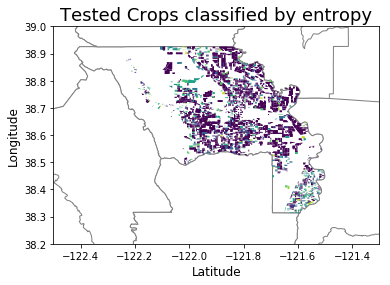

In [271]:
ax = yolo.plot(color = "white", edgecolor = "gray")
testfields.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Crops classified by entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [272]:
misclass_test = testfields.loc[misclassified]

In [273]:
misclass_test

,OBJECTID,Band140per,Band1mean,Band1median,Band1thirdquart,Band1std deviation,Band1firstquart,Band240per,Band2mean,Band2median,...,augband840per,augband8mean,augband8median,augband8thirdquart,augband8std deviation,augband8firstquart,code,entropy,geometry_y,geometry
8,3589791,255.0,792.000000,754.0,1327.00,538.126512,255.0,255.0,701.463693,581.5,...,255.0,1888.125519,1236.0,3762.25,1677.951164,255.0,7,0.325083,"POLYGON ((613575.3210399711 4293327.838150386,...",POLYGON ((-121.6924209380118 38.78137529305095...
17,3461180,255.0,726.272727,700.0,1166.00,473.426922,255.0,255.0,596.835651,571.0,...,255.0,1245.836982,986.5,2240.00,995.933464,255.0,7,0.562335,"POLYGON ((604952.7447589603 4275276.836776647,...",POLYGON ((-121.7944043040848 38.61980760424401...
27,2886975,255.0,754.965753,742.5,1250.75,500.087477,255.0,255.0,655.267711,630.5,...,255.0,1024.582960,973.0,1786.00,770.704563,255.0,8,-0.000000,"POLYGON ((598339.2614548319 4267755.399717314,...",POLYGON ((-121.8714208377628 38.55279567038397...
38,3220037,255.0,862.225000,849.0,1468.75,607.285785,255.0,255.0,799.993161,748.0,...,255.0,1231.917933,1137.0,2160.25,982.345274,255.0,4,1.313834,"POLYGON ((587329.7083170882 4271130.004035975,...",POLYGON ((-121.9973291110581 38.58435281616232...
57,3615253,255.0,779.661677,733.5,1270.75,528.140951,255.0,255.0,665.178565,597.0,...,255.0,1826.357629,648.5,3568.00,1642.978399,255.0,8,1.376227,"POLYGON ((604504.678892916 4301155.770114773, ...",POLYGON ((-121.7956403841713 38.85302390399332...
85,4224516,255.0,823.300000,755.0,1335.50,573.256019,255.0,255.0,756.909824,625.0,...,255.0,1563.689853,967.5,2820.00,1332.294229,255.0,0,1.418484,"POLYGON ((621766.7983458042 4252836.367002271,...",POLYGON ((-121.6052177802758 38.41548282169861...
95,3145168,255.0,837.750000,816.0,1400.00,583.676441,255.0,255.0,743.364608,687.0,...,255.0,1681.710214,1557.5,3112.00,1427.828290,255.0,1,1.088900,"POLYGON ((589235.9138801362 4308002.594888879,...","POLYGON ((-121.97068609195 38.9163961215224, -..."
112,3091300,489.8,851.750000,842.0,1438.75,596.909279,255.0,255.0,836.437500,746.0,...,255.0,1218.205357,824.5,2177.25,970.181547,255.0,4,1.748067,"POLYGON ((606383.9282619169 4288683.339517637,...",POLYGON ((-121.7759115878253 38.74042690250739...
132,3319313,255.0,845.428571,837.5,1434.75,590.501810,255.0,255.0,808.016055,698.5,...,255.0,1454.064220,1322.5,2648.00,1202.060004,255.0,3,1.062738,"POLYGON ((592586.2287763748 4300536.41942786, ...",POLYGON ((-121.9330538257112 38.84877900039177...
136,3621133,255.0,721.942308,701.5,1177.25,467.541994,255.0,255.0,597.654044,562.5,...,255.0,1988.194483,1119.5,3778.00,1754.470293,255.0,8,0.693147,"POLYGON ((605764.64373666 4270765.342018583, 6...",POLYGON ((-121.7857650691016 38.57906281917435...


Text(44.3617,0.5,'Longitude')

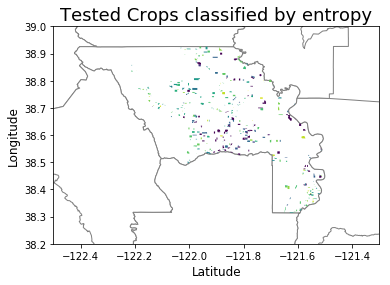

In [274]:
ax = yolo.plot(color = "white", edgecolor = "gray")
misclass_test.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Crops classified by entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [275]:
np.mean(misclass_test["entropy"])

0.9498986967703796

In [276]:
np.mean(testfields["entropy"])

0.2556833738878752

In [20]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes
fullx = lottacrop.iloc[:,1:61].dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

/home/marcel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)


tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [24]:
importances = extra.feature_importances_
std = np.std([extra.feature_importances_ for tree in extra.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [25]:
X_train.shape[1]
importances[indices][:58]

array([0.04307993, 0.04105589, 0.03918572, 0.03659485, 0.03359419,
       0.03289997, 0.03277012, 0.03169145, 0.03112004, 0.02952319,
       0.02919816, 0.02874238, 0.02767337, 0.0266987 , 0.02620187,
       0.02607968, 0.02460791, 0.02412403, 0.02378635, 0.02307589,
       0.02265635, 0.02247493, 0.02168421, 0.02108462, 0.02103608,
       0.02075089, 0.02059096, 0.02024463, 0.0194381 , 0.01855488,
       0.01837745, 0.01757303, 0.0167016 , 0.01650516, 0.01613722,
       0.01543345, 0.01524107, 0.015197  , 0.01504396, 0.01495988,
       0.01418389, 0.00131376, 0.00095572, 0.00088086, 0.00071299,
       0.00056363, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Feature ranking:
1. feature 7 (0.043080)
2. feature 16 (0.041056)
3. feature 9 (0.039186)
4. feature 13 (0.036595)
5. feature 15 (0.033594)


TypeError: 'int' object is not subscriptable

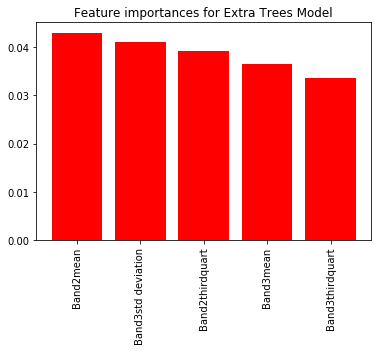

In [26]:
print("Feature ranking:")

for f in range(5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Extra Trees Model")
plt.bar(range(5), importances[indices][:5],
       color="r", yerr=std[indices][:5], align="center")
plt.xticks(range(5), X_train.columns[indices[:5]],rotation = 90)
plt.ylabel = 'Importance'
plt.xlabel = 'Features'
plt.xlim([-1, X_train.shape[1][:5]])

plt.show()

In [27]:
extrapreds = extra.predict(X_test)

In [28]:
confusion_matrix(Y_test,extrapreds)

array([[565,  11,   0,   9,   5,   0,   3,   3,   6,   0,  13],
       [ 11, 407,   0,   6,   3,   0,   0,   3,   1,   7,   7],
       [  3,   4, 124,   1,   6,   0,   0,   3,   3,   3,   4],
       [ 21,  14,   0, 214,   3,   1,   0,   3,   6,   3,   4],
       [  5,   5,   0,   0, 121,   0,   0,   0,   0,   0,  18],
       [  2,   0,   2,   1,   1, 303,   4,   4,   0,   0,   1],
       [  9,   0,   5,   4,   3,   1, 126,   6,   4,   0,  11],
       [ 10,   2,   8,   0,   2,   2,   6, 434,  23,   0,   9],
       [ 15,   1,   9,   3,   3,   2,   2,  36, 683,   0,  10],
       [ 21,  36,   0,   3,   2,   2,   1,   0,   4, 165,   3],
       [  8,  14,   4,   1,   9,   0,   3,   6,   8,   0, 478]])

In [29]:
preds = tester.predict(X_test)
print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6247586872586872
0.8458011583011583
0.8735521235521235
0.8638996138996139


In [30]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.71656357, 6.45089349, 5.44641355, 6.00467072, 5.4610132 ,
       5.87926263, 5.41568224, 6.51701202, 6.83283049, 5.83653683,
       6.49077292])

In [711]:
confusion_matrix(Y_test,preds)

array([[555,   6,  10,   1,   0,   1,   0],
       [ 24, 315,  10,   8,   0,   0,   9],
       [ 20,  11, 207,   0,   0,   0,   5],
       [  7,   6,   1,  29,   1,   0,   2],
       [  5,   2,   2,   0, 153,   0,   1],
       [  2,   1,   0,   0,   0,  11,   0],
       [ 13,  21,   9,   0,   6,   0, 171]])

Alfalfa:0
Almond:1
Grape:2
Oat:3
Rice:4
Sunflower:5
Tomato:6
Walnut :7


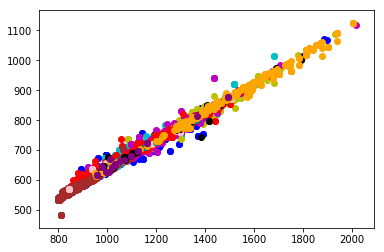

In [911]:
colors = ['b', 'c', 'y', 'm', 'r','brown','pink','teal','black','orange','purple']
for i,j in zip(set(nonorg.crop_list),colors):
    plt.scatter(nonorg.loc[nonorg['crop_list'] == i,['Band2thirdquart']],nonorg.loc[nonorg['crop_list'] == i,['Band2mean']],color = j)